In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats



In [2]:
delphi_hist = np.genfromtxt('delphi_fit.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null = np.genfromtxt('delphi_pmip3_ipsl_hist_null.csv', delimiter=",", dtype=float).flatten()

delphi_pi = np.genfromtxt('delphi_pi.csv', delimiter=",", dtype=float)[400:].flatten()
delphi_pi_null = np.genfromtxt('delphi_pmip3_ipsl_cmip5_picontrol_null.csv', delimiter=",", dtype=float).flatten()

volc = -np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
volc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()

N=10000
win = 60 # window = 20 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_null_dist_1 = np.zeros((N,win))
delphi_pi_dist_1 = np.zeros((N,win))
delphi_pi_null_dist_1 = np.zeros((N,win))


volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12))
    #print(volc_year)
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    #delphi_hist_window = delphi_hist[rand_year[0]:rand_year[0]+win]
    delphi_hist_window = delphi_hist[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = (delphi_hist_window - delphi_hist_window[0])
    #delphi_hist_dist_1[i,:] = (delphi_hist_window - stats.mode(delphi_hist_window)[0])
    i = i + 1

i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist_null.shape[0]-win), 1)
    delphi_null_window = delphi_hist_null[rand_year[0]:rand_year[0]+win]
    #delphi_null_window = delphi_hist_null[rand_year[0]:rand_year[0]+win]
    delphi_hist_null_dist_1[i,:] = (delphi_null_window - delphi_null_window[0])
    #delphi_hist_null_dist_1[i,:] = (delphi_null_window - stats.mode(delphi_null_window)[0])
    i = i + 1

i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_pi.shape[0]-win), 1)
    delphi_pi_window = delphi_pi[rand_year[0]:rand_year[0]+win]
    delphi_pi_dist_1[i,:] = (delphi_pi_window - delphi_pi_window[0])
    #delphi_pi_dist_1[i,:] = (delphi_pi_window - stats.mode(delphi_pi_window)[0])
    i = i + 1

i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_pi_null.shape[0]-win), 1)
    delphi_pi_null_window = delphi_pi_null[rand_year[0]:rand_year[0]+win]
    delphi_pi_null_dist_1[i,:] = (delphi_pi_null_window - delphi_pi_null_window[0])
    #delphi_pi_null_dist_1[i,:] = (delphi_pi_null_window - stats.mode(delphi_pi_null_window)[0])
    i = i + 1

In [3]:
delphi_hist_dist_2 = delphi_hist_dist_1.flatten()
delphi_hist_null_dist_2 = delphi_hist_null_dist_1.flatten()
delphi_pi_dist_2 = delphi_pi_dist_1.flatten()
delphi_pi_null_dist_2 = delphi_pi_null_dist_1.flatten()

np.savetxt('delphi_hist_dist_2.csv',delphi_hist_dist_2 , delimiter=",")
np.savetxt('delphi_hist_null_dist_2.csv',delphi_hist_null_dist_2 , delimiter=",")
np.savetxt('delphi_pi_dist_2.csv',delphi_pi_dist_2 , delimiter=",")
np.savetxt('delphi_pi_null_dist_2.csv',delphi_pi_null_dist_2 , delimiter=",")

In [4]:
delphi_hist_dist_2 = np.genfromtxt('delphi_hist_dist_2.csv', delimiter=",", dtype=float).flatten()
delphi_hist_null_dist_2 = np.genfromtxt('delphi_hist_null_dist_2.csv', delimiter=",", dtype=float).flatten()
delphi_pi_dist_2 = np.genfromtxt('delphi_pi_dist_2.csv', delimiter=",", dtype=float).flatten()
delphi_pi_null_dist_2 = np.genfromtxt('delphi_pi_null_dist_2.csv', delimiter=",", dtype=float).flatten()

delphi_hist_dist_2 = delphi_hist_dist_2 / (2*np.pi)
delphi_hist_null_dist_2 = delphi_hist_null_dist_2 / (2*np.pi)
delphi_pi_dist_2 = delphi_pi_dist_2 / (2*np.pi)
delphi_pi_null_dist_2 = delphi_pi_null_dist_2 / (2*np.pi)

([<matplotlib.axis.XTick at 0x2b7460154d30>,
 <a list of 5 Text xticklabel objects>)

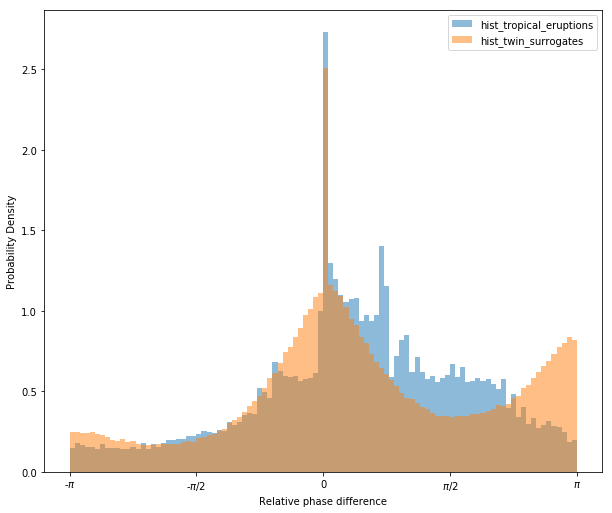

In [5]:
plt.figure(figsize=[10, 8.5])
values_hist, bins_hist, _ = plt.hist(delphi_hist_dist_2, normed=True, bins=100, alpha=0.5, label='hist_tropical_eruptions', range=(-1,1))
values_hist_null, bins_hist_null, _ = plt.hist(delphi_hist_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='hist_twin_surrogates', range=(-1,1))

plt.xlabel('Relative phase difference')
plt.ylabel('Probability Density')
plt.legend()
plt.xticks(np.arange(-1, 1.1, step=0.5), ['-$\pi$','-$\pi$/2','0','$\pi$/2','$\pi$'])
#area = sum(np.diff(bins_hist[:11])*values_hist[:10])
#print(area)
#area = sum(np.diff(bins_hist_null[:11])*values_hist_null[:10])
#print(bins_hist[11],area)
#plt.savefig('rel_phase_diff_hist_histnull.png', format='png', dpi=1000)
# around pi/13 is what we are considering as small which is around 
#print(values_hist)

0.08611441065875783
-0.8211382113821137 0.06839151405627601


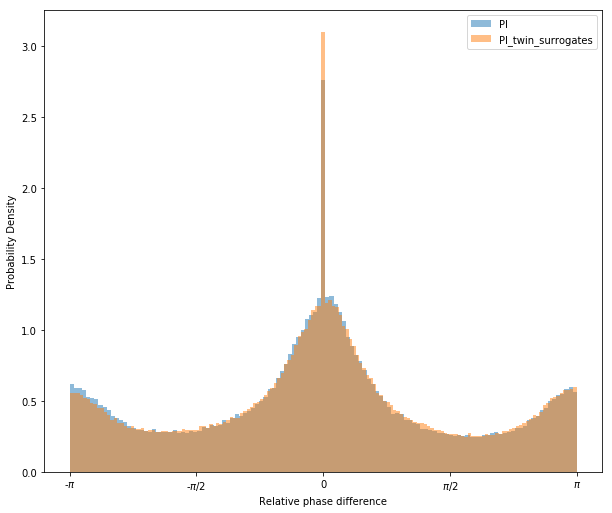

In [6]:
plt.figure(figsize=[10, 8.5])
values_pi, bins_pi, _ = plt.hist(delphi_pi_dist_2, normed=True, bins='fd', alpha=0.5, label='PI', range=(-1,1))
values_pi_null, bins_pi_null, _ = plt.hist(delphi_pi_null_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='PI_twin_surrogates', range=(-1,1))

plt.xlabel('Relative phase difference')
plt.ylabel('Probability Density')
plt.legend()
plt.xticks(np.arange(-1, 1.1, step=0.5), ['-$\pi$','-$\pi$/2','0','$\pi$/2','$\pi$'])
area = sum(np.diff(bins_pi[:11])*values_pi[:10])
print(area)
area = sum(np.diff(bins_pi_null[:11])*values_pi_null[:10])
print(bins_pi[11],area)
#plt.savefig('rel_phase_diff_pi_pinull.png', format='png', dpi=1000)
# around pi/13 is what we are considering as small which is around 

0.021330203568252645
-0.8523489932885906 0.07353745974341709


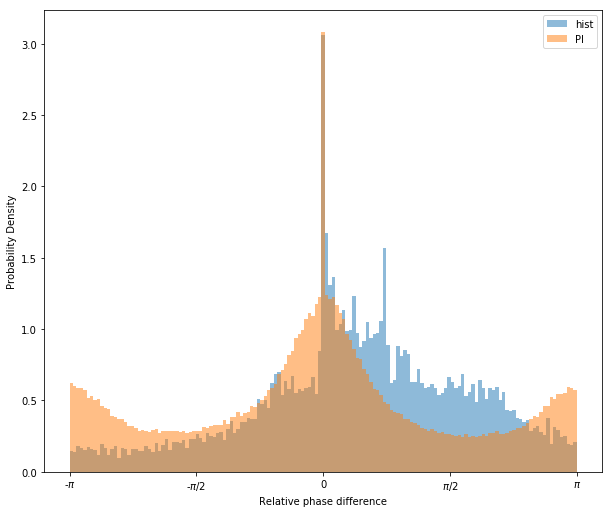

In [7]:
plt.figure(figsize=[10, 8.5])
values_hist, bins_hist, _ = plt.hist(delphi_hist_dist_2, normed=True, bins='fd', alpha=0.5, label='hist', range=(-1,1))
values_pi, bins_pi, _ = plt.hist(delphi_pi_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='PI', range=(-1,1))

plt.xlabel('Relative phase difference')
plt.ylabel('Probability Density')
plt.legend()
plt.xticks(np.arange(-1, 1.1, step=0.5), ['-$\pi$','-$\pi$/2','0','$\pi$/2','$\pi$'])
area = sum(np.diff(bins_hist[:11])*values_hist[:10])
print(area)
area = sum(np.diff(bins_pi[:11])*values_pi[:10])
print(bins_pi[11],area)
plt.savefig('rel_phase_diff_hist_pi_minus1_1.png', format='png', dpi=1000)
# around pi/13 is what we are considering as small which is around 

In [8]:
volc = -np.genfromtxt('sigl.txt', delimiter=",", dtype=float).flatten()
volc_source = np.genfromtxt('volc_source_850_1850.csv', delimiter=",", dtype=float).flatten()
delphi_hist = np.genfromtxt('delphi_hist.csv', delimiter=",", dtype=float).flatten()
delphi_hist_smooth = np.genfromtxt('delphi_fit.csv', delimiter=",", dtype=float).flatten()


N=10000
win = 240 # window = 20 years
delphi_hist_dist_1 = np.zeros((N,win))
delphi_hist_smooth_dist_1 = np.zeros((N,win))


volc_year = 0
i = 0
while i < N :
    rand_year = random.sample(range(0, delphi_hist.shape[0]-win), 1)
    volc_year = int(np.round(rand_year[0]/12)) 
    if volc_source[volc_year] != 1.0 : # Tropical Eruptions only
        continue
    if volc[volc_year] < 3.7 : # Large Volcanic eruptions
        continue
    delphi_hist_window = delphi_hist[rand_year[0]:rand_year[0]+win]
    delphi_hist_dist_1[i,:] = (delphi_hist_window - stats.mode(delphi_hist_window)[0])
    delphi_hist_window = delphi_hist_smooth[rand_year[0]:rand_year[0]+win]
    delphi_hist_smooth_dist_1[i,:] = (delphi_hist_window - stats.mode(delphi_hist_window)[0])
    i = i + 1
    


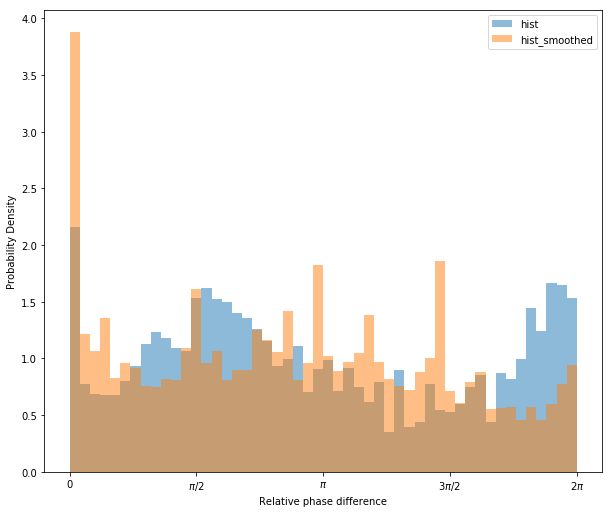

In [9]:
delphi_hist_dist_2 = delphi_hist_dist_1.flatten() / (2*np.pi)
delphi_hist_smooth_dist_2 = delphi_hist_smooth_dist_1.flatten() / (2*np.pi)

plt.figure(figsize=[10, 8.5])
values_hist, bins_hist, _ = plt.hist(delphi_hist_dist_2, normed=True, bins=50, alpha=0.5, label='hist', range=(0,1))
values_hist_smooth, bins_hist_null, _ = plt.hist(delphi_hist_smooth_dist_2, normed=True, bins=bins_hist, alpha=0.5, label='hist_smoothed', range=(0,1))

plt.xlabel('Relative phase difference')
plt.ylabel('Probability Density')
plt.legend()
plt.xticks(np.arange(0, 1.1, step=0.25), ['0','$\pi$/2','$\pi$','3$\pi$/2','$2\pi$'])
plt.savefig('rel_phase_diff_hist_n_histsmooth.png', format='png', dpi=1000)